# Task # 5 - To explore Business Analytics
Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’
You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?

# Pankaj Dubey

## **Import All the libararies**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [74]:
data = pd.read_csv('SampleSuperstore.csv')

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.shape

(9994, 13)

In [6]:
data.duplicated().sum()

17

In [7]:
data.drop_duplicates().head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## EDA on Superstore dataset

In [8]:
data.groupby(data['Category']).count()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Sub-Category,Sales,Quantity,Discount,Profit
Category,,,,,,,,,,,,
Furniture,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121
Office Supplies,6026,6026,6026,6026,6026,6026,6026,6026,6026,6026,6026,6026
Technology,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847


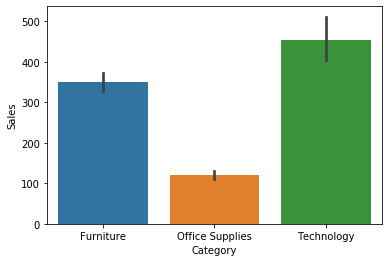

In [9]:
sns.barplot(x = data['Category'], y = data['Sales'])

**Ass We can see observation is in Technology Category the sales is maximum** 

In [10]:
data.groupby(data['Ship Mode']).count()

,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Ship Mode,,,,,,,,,,,,
First Class,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538
Same Day,543,543,543,543,543,543,543,543,543,543,543,543
Second Class,1945,1945,1945,1945,1945,1945,1945,1945,1945,1945,1945,1945
Standard Class,5968,5968,5968,5968,5968,5968,5968,5968,5968,5968,5968,5968


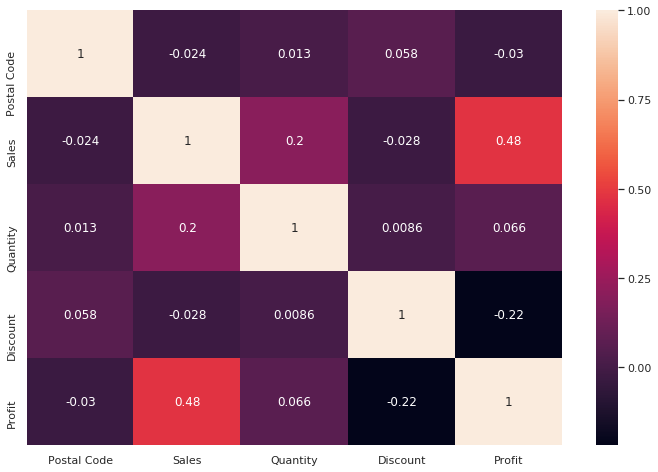

In [39]:
#Checking correlation between columns visually
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data.corr(),annot=True)

### **No such strong co-relations are found!**

In [13]:
data.groupby(data['Country']).count()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Country,,,,,,,,,,,,
United States,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994


In [14]:
pd.DataFrame(data.columns)

,0
0,Ship Mode
1,Segment
2,Country
3,City
4,State
5,Postal Code
6,Region
7,Category
8,Sub-Category
9,Sales


In [15]:
data['Postal Code'].nunique()

631

In [16]:
data.groupby(data['Region']).count()

,Ship Mode,Segment,Country,City,State,Postal Code,Category,Sub-Category,Sales,Quantity,Discount,Profit
Region,,,,,,,,,,,,
Central,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323
East,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848
South,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620
West,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203


In [17]:
data['Quantity'].value_counts().sum()

9994

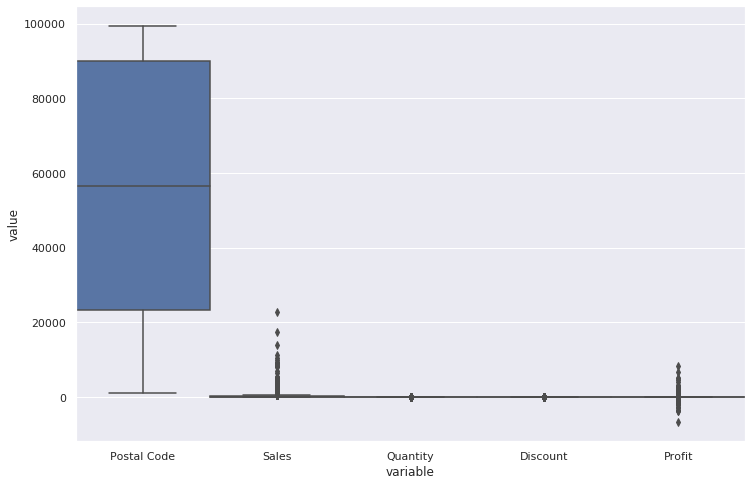

In [44]:
#BoxPlot
data_con=data.select_dtypes(include=[np.number])
plt.figure(figsize=[12,8])
sns.set(style="darkgrid")
sns.boxplot(x="variable", y="value", data=pd.melt(data_con), width=1)

plt.show()


**From the above plot, the outliers in Sales and Profit are clearly seen. As it's a large data set, we can remove those rows containing outliers to improve our results.**

In [21]:
#Removal of Outliers
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global ds      
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                ds = dataset.loc[dataset[col].isin(outlier)]

In [22]:
remove_outlier(data,k=3.33)

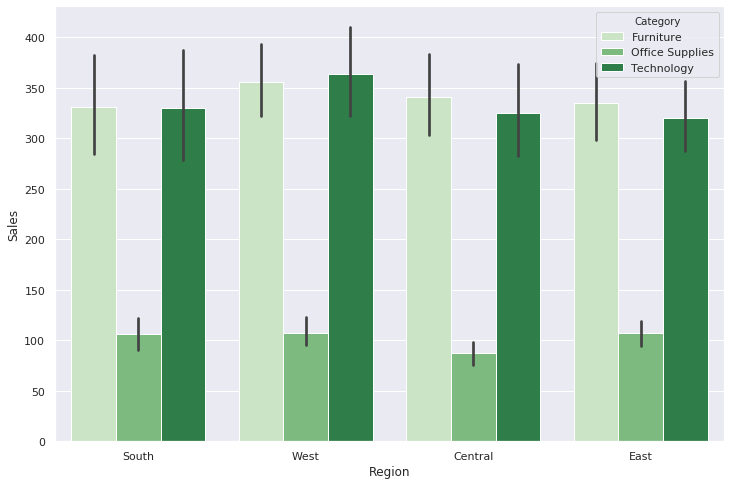

In [41]:
#Category wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=ds, palette="Greens")


**Observation:- In each and every every region, sales for 'Office Supplies' are very poor. Furniture and Technology are well ahead.**


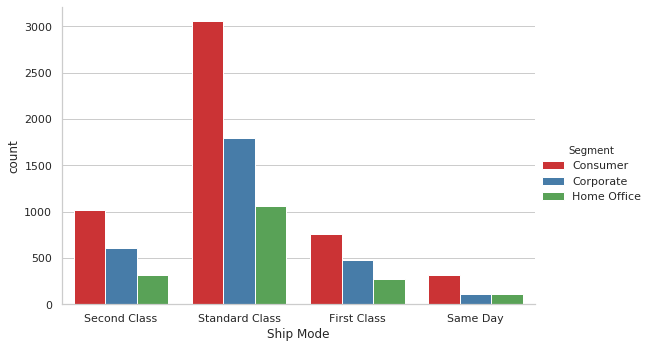

In [24]:
#Segment wise count of the ship modes
sns.catplot("Ship Mode", hue="Segment", data=ds, kind="count", aspect=1.5, palette="Set1")
plt.show()

**Observation:- No much surprises here. Consumer count is highest in each case and they generally prefer 'Standard Class.**

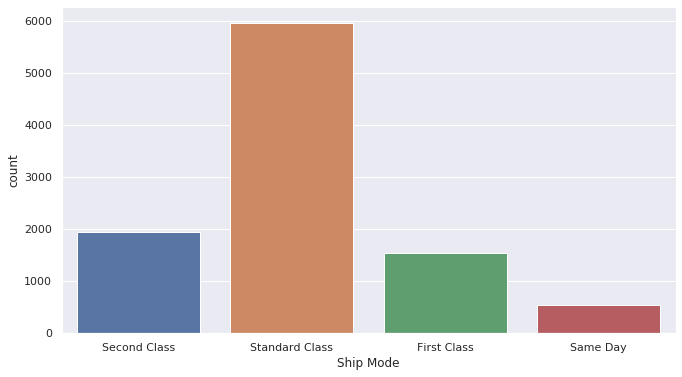

In [45]:
plt.figure(figsize=(11,6))
sns.countplot(x=data['Ship Mode'])
plt.show()

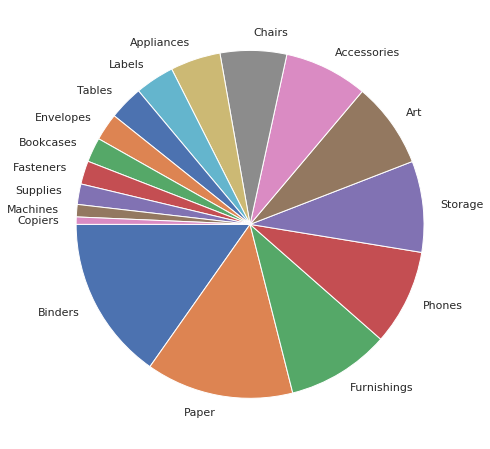

In [47]:
plt.figure(figsize=(15,8))
plt.pie(data['Sub-Category'].value_counts(), labels=data['Sub-Category'].value_counts().index, startangle=180, radius=1)
plt.show()


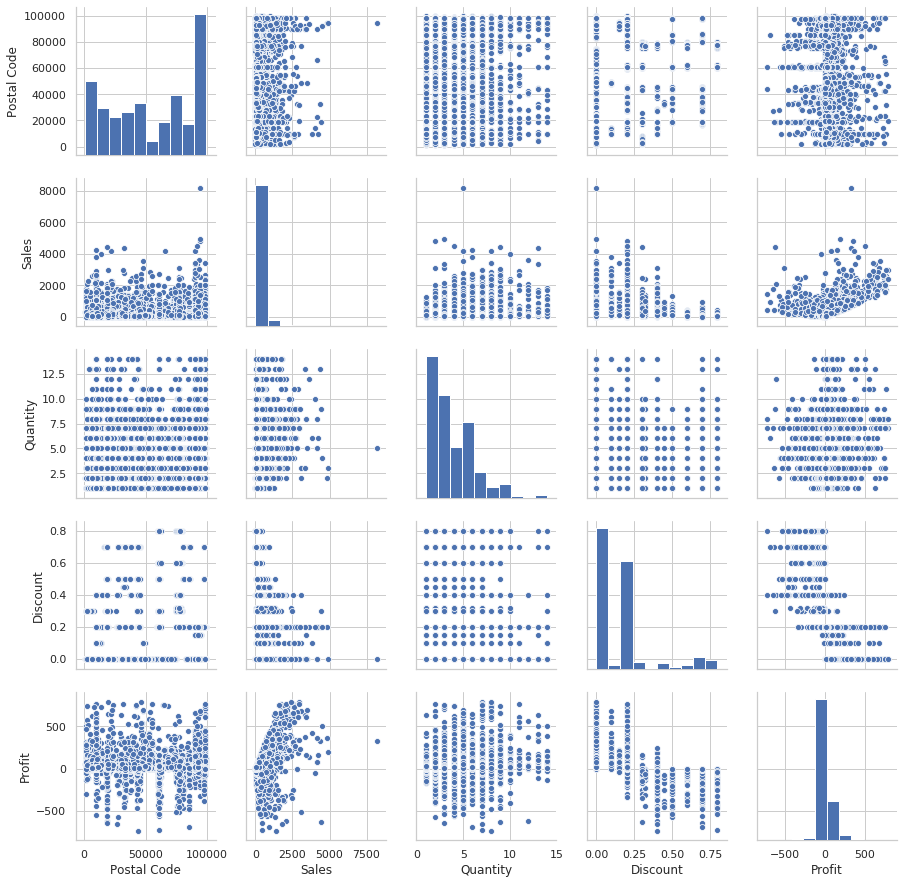

In [25]:
#Let's get some aggregated views from pairplot
sns.pairplot(ds)

**Observation:- No such strong relations are found here between columns of the Dataset.¶**


In [59]:
#Let's get some insights based on States
grouped= ds.groupby("State")


In [60]:
#aggregated Sales per State
agg_sales=grouped['Sales'].agg(np.sum).sort_values(ascending=False).reset_index()


In [61]:
#Cities with highest total sales
agg_sales.head()


,State,Sales
0,California,436006.3995
1,New York,242354.5130
2,Texas,150890.6198
3,Washington,115431.4760
4,Pennsylvania,97853.5380


In [62]:
#Aggregated Profit per State
agg_profit=grouped['Profit'].agg(np.sum).sort_values(ascending=False).reset_index()


In [63]:
#Cities with Highest total Profit
agg_profit.head()

,State,Profit
0,California,68802.9169
1,New York,48330.3176
2,Washington,23197.8159
3,Michigan,14276.7356
4,Virginia,13611.4975


**Observation:- California State has the most amount and Profit of sales followed by New York.**


In [64]:
#Let's get some insights based on Cities
grouped= ds.groupby("City")

In [65]:
#aggregated Sales per city
agg_sales=grouped['Sales'].agg(np.sum).sort_values(ascending=False).reset_index()

In [66]:
#Cities with highest total sales
agg_sales.head()

,City,Sales
0,New York City,197295.143
1,Los Angeles,164453.989
2,San Francisco,109869.132
3,Seattle,96330.948
4,Philadelphia,91788.401


In [67]:
#Aggregated Profit per city
agg_profit=grouped['Profit'].agg(np.sum).sort_values(ascending=False).reset_index()

In [68]:
#States with Highest total Profit
agg_profit.head()

,City,Profit
0,New York City,39957.8971
1,Los Angeles,26553.7452
2,Seattle,18951.2609
3,San Francisco,16562.3989
4,Detroit,8235.4208



**Observation:- New York City has the most amount and Profit of sales followed by Los Angeles.**

In [69]:
#Average Sales per city
avg_sales=grouped['Sales'].agg(np.mean).sort_values(ascending=False).reset_index()
#Average Profit per city
avg_profit=grouped['Profit'].agg(np.mean).sort_values(ascending=False).reset_index()
#Average Discount per city
avg_dist=grouped['Discount'].agg(np.mean).sort_values(ascending=False).reset_index()

In [70]:
#Cities having High Average Discounts
high_dist=avg_dist[avg_dist['Discount'] >=0.7]

#Cities having low Average Discounts
low_dist=avg_dist[avg_dist['Discount']==0]


#Cities having High Average Sales
high_sales=avg_sales[avg_sales['Sales']>500]

#Cities having low Average Sales
low_sales=avg_sales[avg_sales['Sales']<50]


#Cities having High Average Profit
high_profit=avg_profit[avg_profit['Profit']>100]

#Cities having low Average profit
low_profit=avg_profit[avg_profit['Profit']<0]

#Cities with High-Average-Discounts but Low-Average-Sales
merged= pd.merge(high_dist,low_sales, on=['City'],how='inner')
merged

,City,Discount,Sales
0,Deer Park,0.8,6.924
1,Abilene,0.8,1.392
2,Missouri City,0.8,6.370
3,Romeoville,0.8,8.952
4,Pensacola,0.7,2.214
5,Elyria,0.7,1.824
6,Ormond Beach,0.7,2.808


**Important Insight 1 :- Here we can see 7 Cities where the Company is giving high discounts but Sales very very low. As already Discounts are high, no question of increasing discount further. Hence here our investment is not fruitful.**


In [71]:
#Cities with high Average Sales as well as Average Profit
merged2= pd.merge(high_sales,high_profit, on=['City'], how='inner')
merged2

,City,Sales,Profit
0,Cheyenne,1603.136000,100.196000
1,Bellingham,1263.413333,203.530267
2,Independence,1208.685000,487.831500
3,Burbank,1082.386000,254.844600
4,Beverly,861.063333,218.306467
5,Appleton,835.655000,277.383150
6,Torrance,783.067000,136.287750
7,Lehi,758.363000,225.831300
8,Saint Peters,697.160000,146.403600
9,Norman,675.665000,134.764350


**Important Insight 2 :-The stats above are very pleasing. In all these 15 Cities the sales as well as profit is quite good. Hence if we can invest in these cities (in terms of Discount and other aspects), business can increase more. These can be termed as the Hot-Spots.**

### **Conclusion:-**
**Overall scinerio shows large cities, like New York, Los Angeles, Seatle, San Francisco are generating highest amount of Sales as well as Profit. And in case of Categories, Technology is always leading in terms of Sales and Profit. Some useful insights are shown like, some cities are there, where company is giving huge discounts but very less sales and profit is generating. Also there are cities, where discounts are totaly '0', but they are generating high profits. Hence great focus are to be given in those cases. If above mentioned points are taken care of, surely some improvements can be done.**
